Idiom1: Population Growth vs. GDP Growth Over Time

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns


In [3]:
df = pd.read_csv("HW3_Data.csv")

In [4]:
columns = ["Country Name", "Year", "SP.POP.GROW", "NY.GDP.MKTP.KD.ZG"]
df_selected = df[columns]

In [5]:
df_selected.columns = ["Country", "Year", "Population Growth (%)", "GDP Growth (%)"]

In [6]:
df_selected["Year"] = pd.to_numeric(df_selected["Year"], errors="coerce")

/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/2084285643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Year"] = pd.to_numeric(df_selected["Year"], errors="coerce")


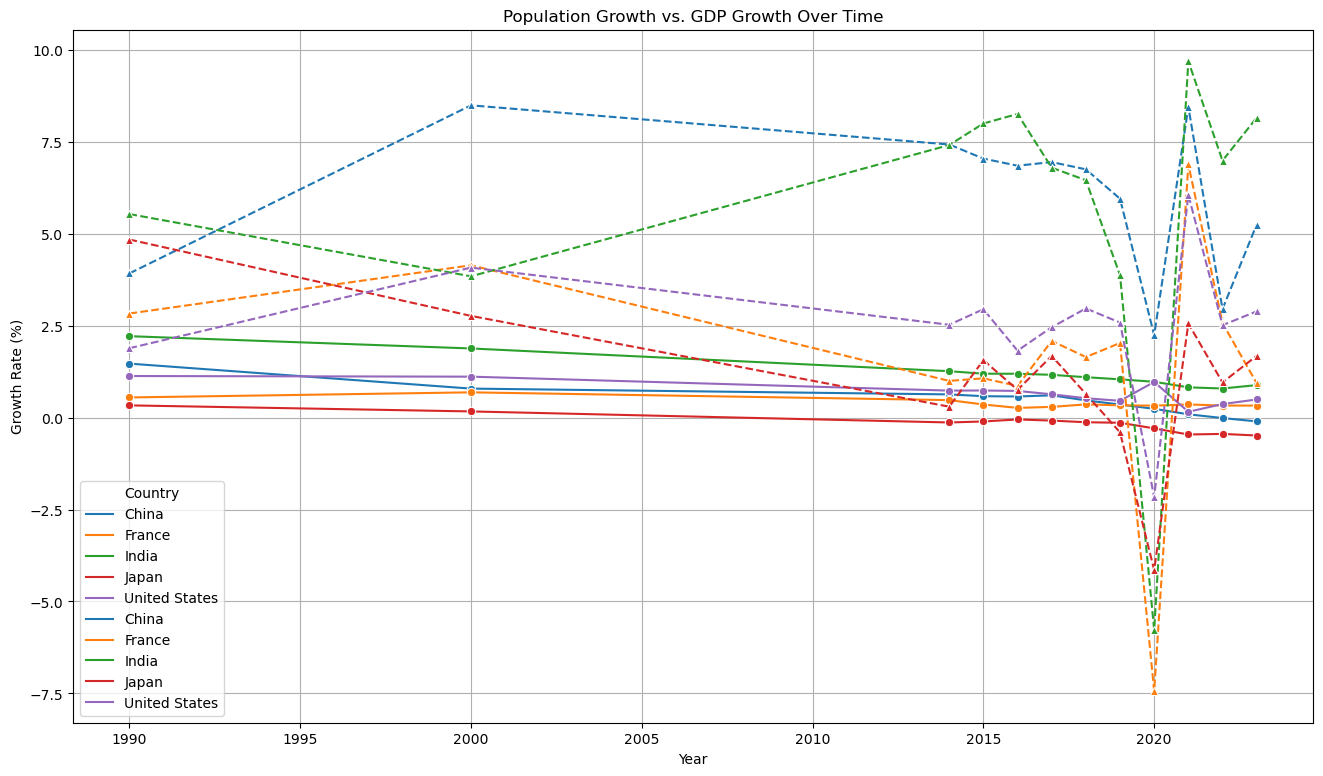

In [31]:
plt.figure(figsize=(16, 9))

sns.lineplot(data=df_selected, x="Year", y="Population Growth (%)", hue="Country", marker="o", linestyle="-")
sns.lineplot(data=df_selected, x="Year", y="GDP Growth (%)", hue="Country", marker="^", linestyle="--")

plt.title("Population Growth vs. GDP Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.legend(title="Country")
plt.grid(True)
plt.show()

Idiom2: Population Growth vs. GDP Growth (Correlation)

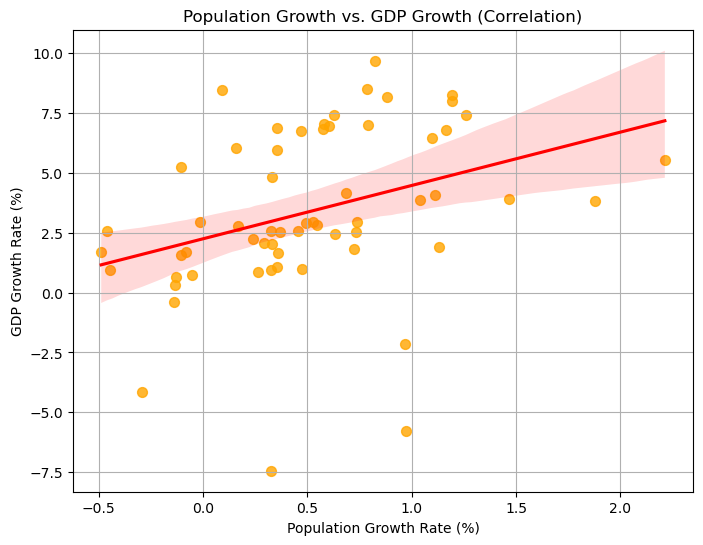

In [27]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_selected, 
    x="Population Growth (%)", 
    y="GDP Growth (%)", 
    scatter_kws={"s": 50, "color": "orange"},  
    line_kws={"color": "red"}  
)

plt.title("Population Growth vs. GDP Growth (Correlation)")
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("GDP Growth Rate (%)")
plt.grid(True)
plt.show()

Idiom 3: Fertility Rate vs. GDP Growth

/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/3174308164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Fertility Rate"] = pd.to_numeric(df_selected["Fertility Rate"], errors="coerce")
/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/3174308164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["GDP Growth (%)"] = pd.to_numeric(df_selected["GDP Growth (%)"], errors="coerce")


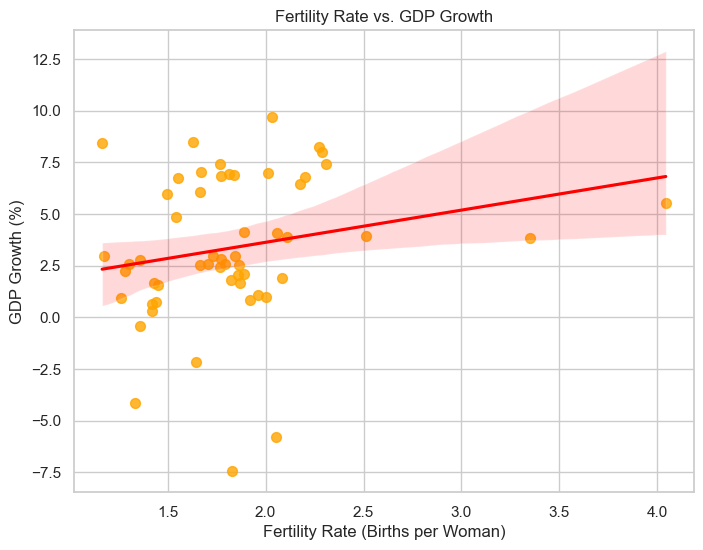

In [32]:
columns = ["Country Name", "Year", "SP.DYN.TFRT.IN", "NY.GDP.MKTP.KD.ZG"]
df_selected = df[columns]
df_selected.columns = ["Country", "Year", "Fertility Rate", "GDP Growth (%)"]
df_selected["Fertility Rate"] = pd.to_numeric(df_selected["Fertility Rate"], errors="coerce")
df_selected["GDP Growth (%)"] = pd.to_numeric(df_selected["GDP Growth (%)"], errors="coerce")
df_selected = df_selected.dropna()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(data=df_selected, x="Fertility Rate", y="GDP Growth (%)", scatter_kws={"s": 50, "color": "orange"}, line_kws={"color": "red"})
plt.title("Fertility Rate vs. GDP Growth")
plt.xlabel("Fertility Rate (Births per Woman)")
plt.ylabel("GDP Growth (%)")
plt.grid(True)
plt.show()

Idiom 4: Life Expectancy vs. GDP Growth

In [33]:
columns = ["Country Name", "Year", "SP.DYN.LE00.IN", "NY.GDP.MKTP.KD.ZG"]
df_selected = df[columns]
df_selected.columns = ["Country", "Year", "Life Expectancy", "GDP Growth (%)"]
df_selected["Year"] = pd.to_numeric(df_selected["Year"], errors="coerce")
df_selected["Life Expectancy"] = pd.to_numeric(df_selected["Life Expectancy"], errors="coerce")
df_selected["GDP Growth (%)"] = pd.to_numeric(df_selected["GDP Growth (%)"], errors="coerce")
df_selected = df_selected.dropna()
countries = ["China", "United States", "India", "Japan", "France"]
df_filtered = df_selected[df_selected["Country"].isin(countries)]


/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/4106952885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Year"] = pd.to_numeric(df_selected["Year"], errors="coerce")
/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/4106952885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Life Expectancy"] = pd.to_numeric(df_selected["Life Expectancy"], errors="coerce")
/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/4106952885.py:6: Sett

In [34]:
colors = {
    "China": "blue",
    "United States": "red",
    "India": "green",
    "Japan": "purple",
    "France": "orange"
}


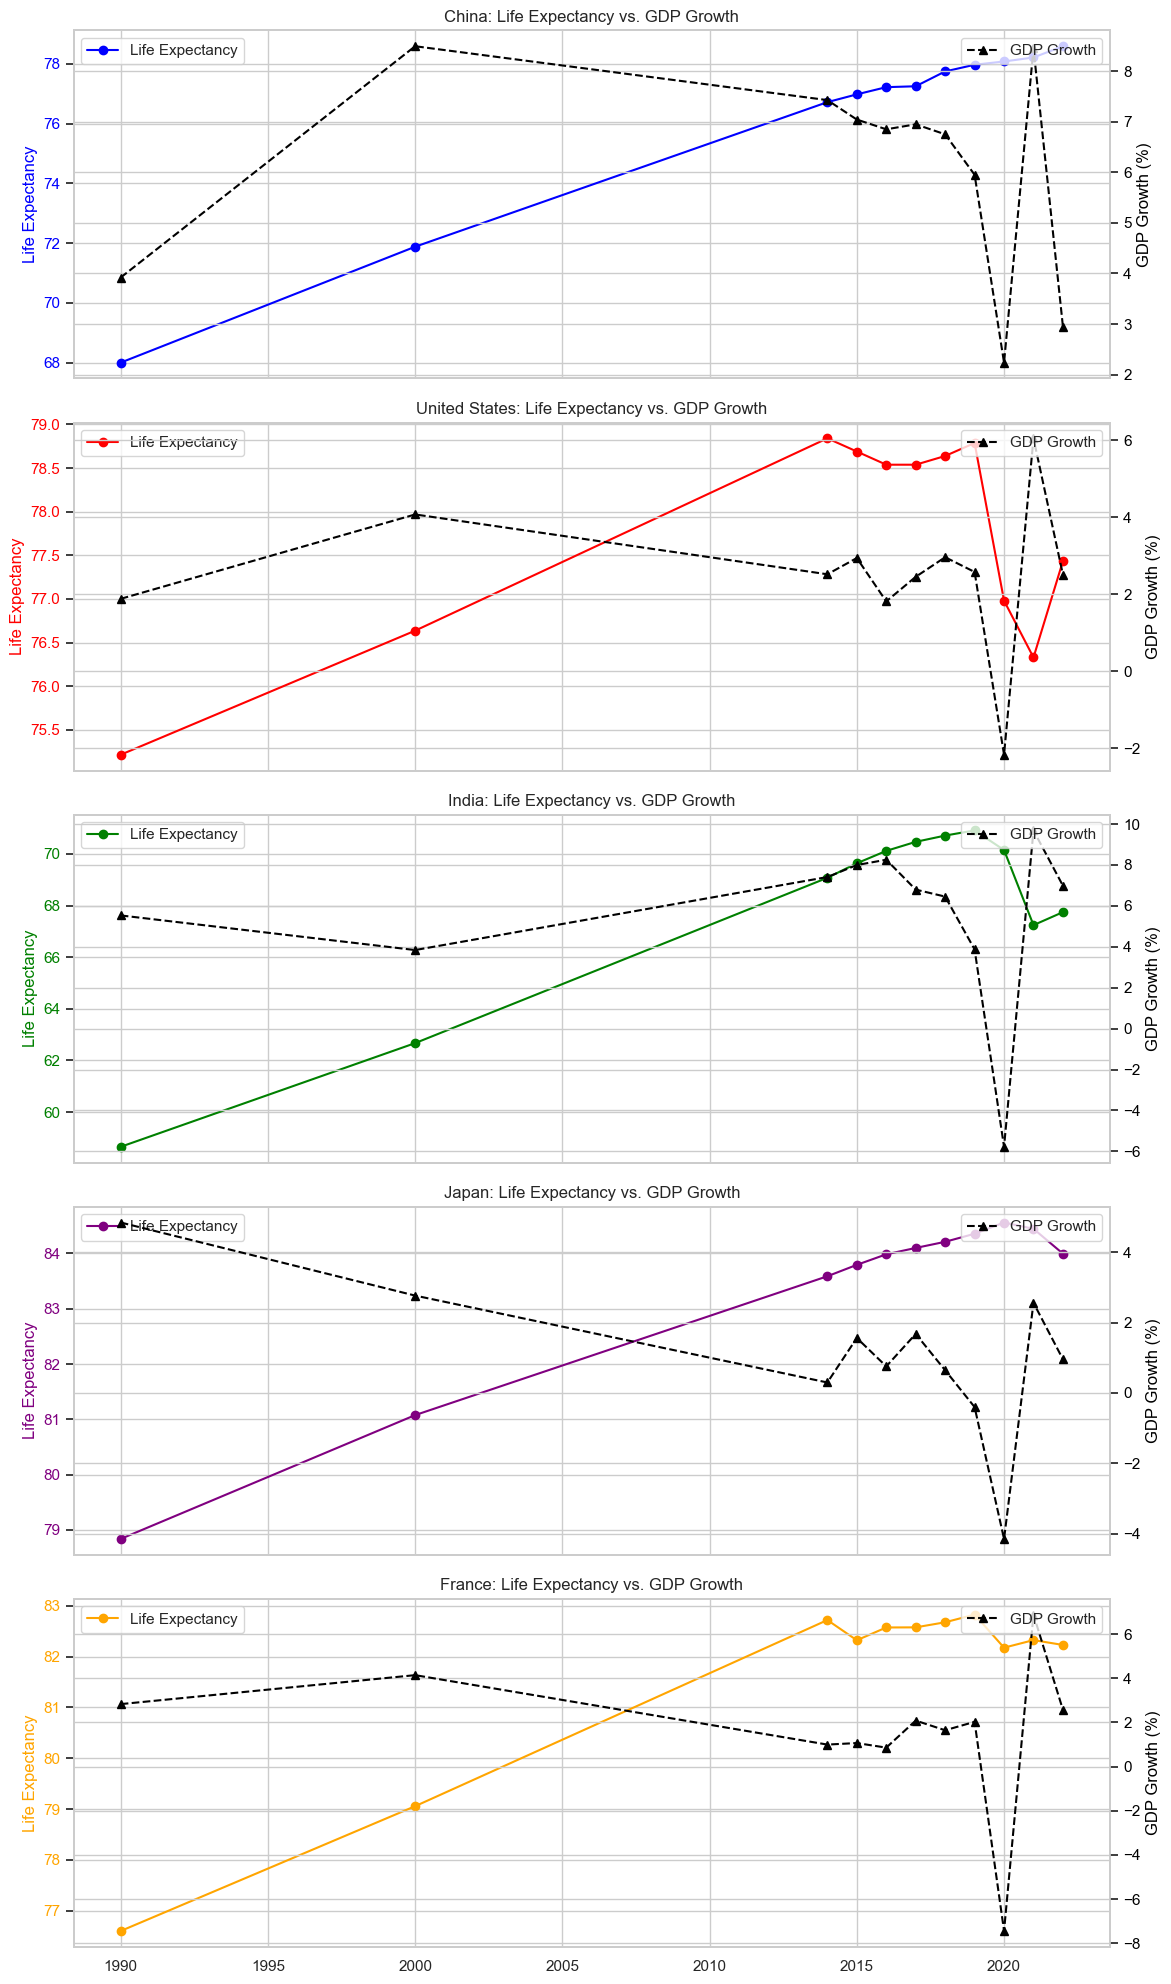

In [35]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 20), sharex=True)
for ax, country in zip(axes, countries):
    df_country = df_filtered[df_filtered["Country"] == country]

    
    ax.set_ylabel("Life Expectancy", color=colors[country])
    ax.plot(df_country["Year"], df_country["Life Expectancy"], color=colors[country], marker="o", linestyle="-", label="Life Expectancy")
    ax.tick_params(axis="y", labelcolor=colors[country])

   
    ax2 = ax.twinx()
    ax2.set_ylabel("GDP Growth (%)", color="black")
    ax2.plot(df_country["Year"], df_country["GDP Growth (%)"], color="black", marker="^", linestyle="--", label="GDP Growth")
    ax2.tick_params(axis="y", labelcolor="black")

    
    ax.set_title(f"{country}: Life Expectancy vs. GDP Growth")

    
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")


plt.xlabel("Year")


plt.tight_layout()


plt.show()

Idiom 5: Urban Growth vs. GDP Growth （2000 vs 2020）

In [40]:
columns = ["Country Name", "Year", "SP.URB.GROW", "NY.GDP.MKTP.KD.ZG", "SP.POP.TOTL"]
df_selected = df[columns]
df_selected.columns = df_selected.columns.str.strip()
df_selected.rename(columns={
    "Country Name": "Country",
    "SP.URB.GROW": "Urban Growth",
    "NY.GDP.MKTP.KD.ZG": "GDP Growth",
    "SP.POP.TOTL": "Total Population"
}, inplace=True)
df_selected["Urban Growth"] = pd.to_numeric(df_selected["Urban Growth"], errors="coerce")
df_selected["GDP Growth"] = pd.to_numeric(df_selected["GDP Growth"], errors="coerce")
df_selected["Total Population"] = pd.to_numeric(df_selected["Total Population"], errors="coerce")
df_selected = df_selected.dropna()
years = [2000,2020]

/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/415603903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns={
/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/415603903.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Urban Growth"] = pd.to_numeric(df_selected["Urban Growth"], errors="coerce")
/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/415603903.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

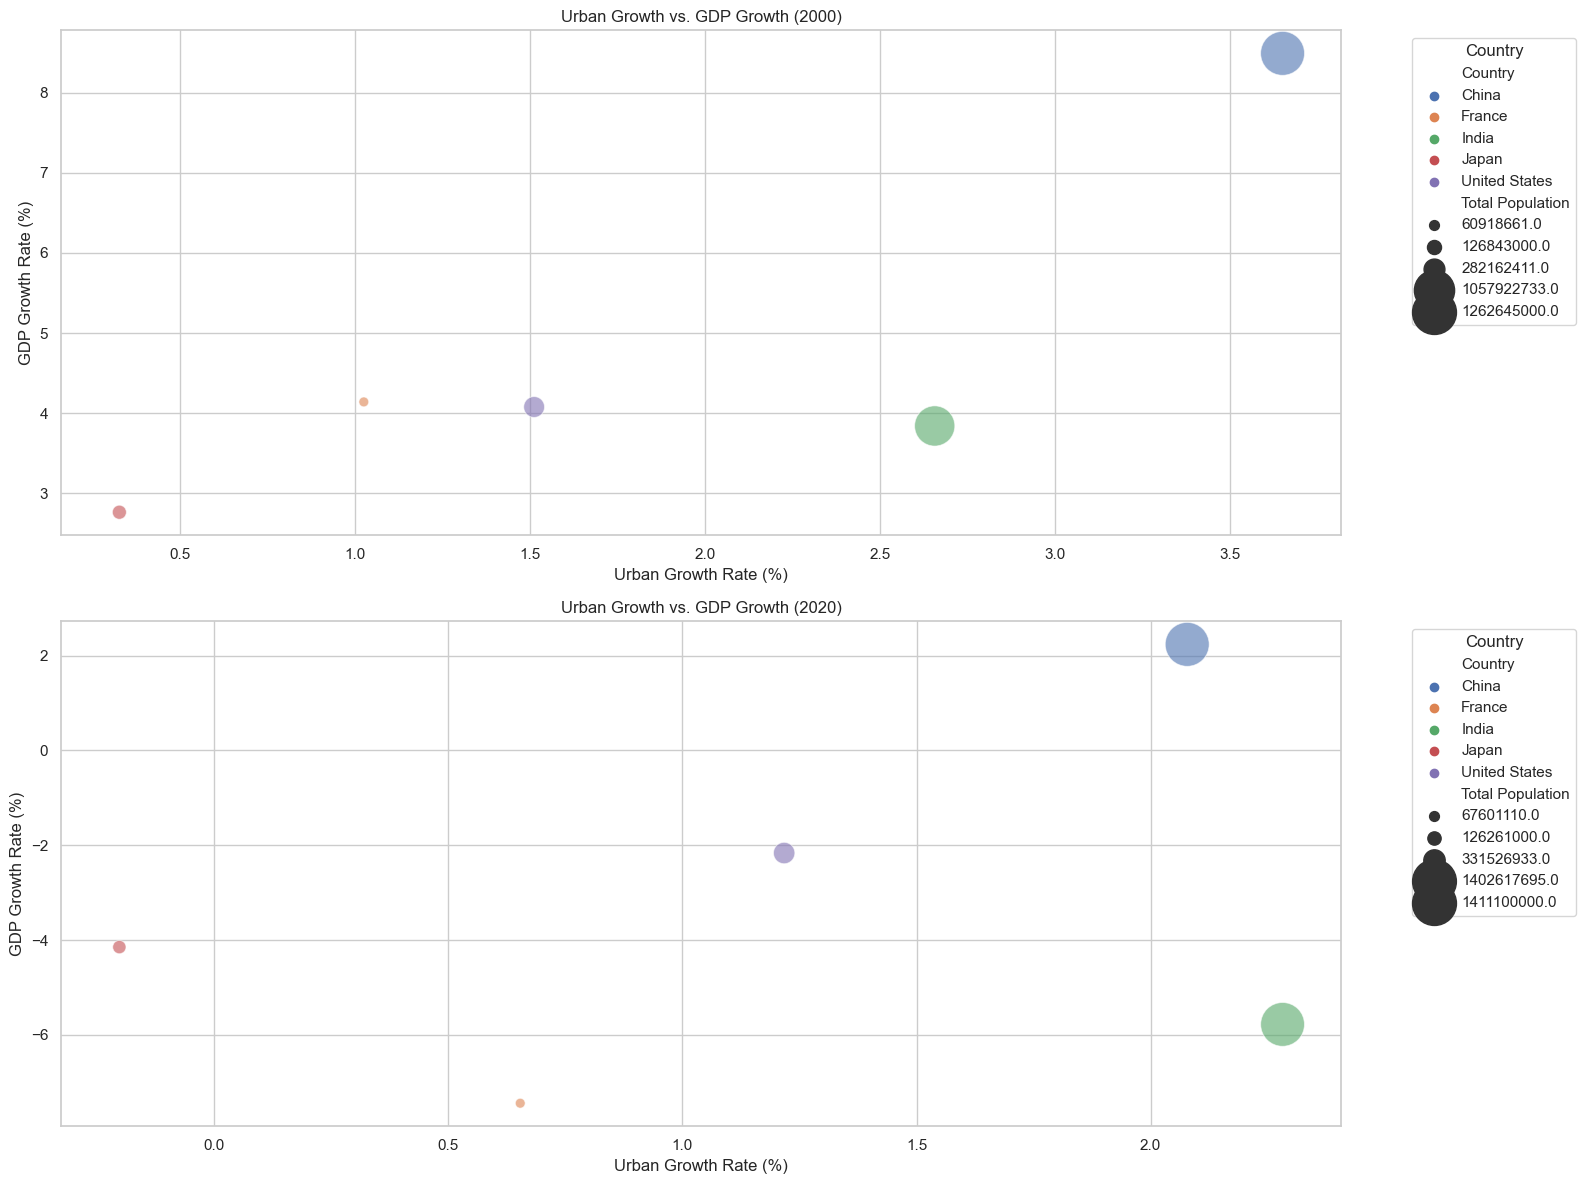

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
axes = axes.flatten()
for i, year in enumerate(years):
    df_year = df_selected[df_selected["Year"] == year]
    
    sns.scatterplot(data=df_year, x="Urban Growth", y="GDP Growth",
                    size="Total Population", hue="Country", alpha=0.6, sizes=(50, 1000), ax=axes[i])
    
    axes[i].set_title(f"Urban Growth vs. GDP Growth ({year})")
    axes[i].set_xlabel("Urban Growth Rate (%)")
    axes[i].set_ylabel("GDP Growth Rate (%)")
    axes[i].legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

Idiom 6: Export Share vs. GDP Growth

In [48]:
columns = ["Country Name", "Year", "NE.EXP.GNFS.ZS", "NY.GDP.MKTP.KD.ZG"]
df_selected = df[columns]
df_selected.columns = ["Country", "Year", "Export Share of GDP (%)", "GDP Growth (%)"]
df_selected["Export Share of GDP (%)"] = pd.to_numeric(df_selected["Export Share of GDP (%)"], errors="coerce")
df_selected["GDP Growth (%)"] = pd.to_numeric(df_selected["GDP Growth (%)"], errors="coerce")
df_selected = df_selected.dropna()


/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/2033879022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Export Share of GDP (%)"] = pd.to_numeric(df_selected["Export Share of GDP (%)"], errors="coerce")
/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/2033879022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["GDP Growth (%)"] = pd.to_numeric(df_selected["GDP Growth (%)"], errors="coerce")


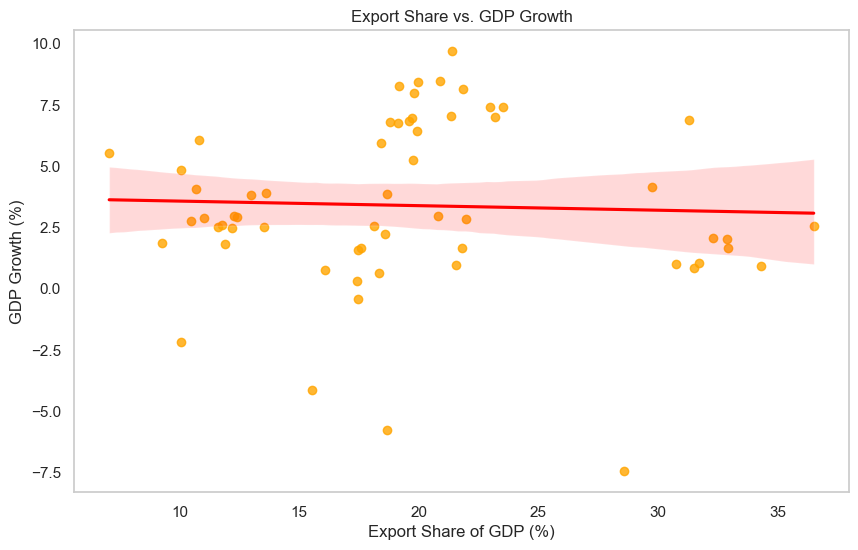

In [49]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_selected, x="Export Share of GDP (%)", y="GDP Growth (%)", 
            scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.title("Export Share vs. GDP Growth")
plt.xlabel("Export Share of GDP (%)")
plt.ylabel("GDP Growth (%)")
plt.grid()
plt.show()

Idiom 7: Industry Share vs. Total Trade Dependency (2000 vs 2020)

In [53]:
columns = ["Country Name", "Year", "NV.IND.TOTL.ZS", "NE.EXP.GNFS.ZS", "NE.IMP.GNFS.ZS"]
df_selected = df[columns]
df_selected.columns = ["Country", "Year", "Industry Share of GDP (%)", "Exports (% of GDP)", "Imports (% of GDP)"]
df_selected["Total Trade (% of GDP)"] = df_selected["Exports (% of GDP)"] + df_selected["Imports (% of GDP)"]
df_selected["Industry Share of GDP (%)"] = pd.to_numeric(df_selected["Industry Share of GDP (%)"], errors="coerce")
df_selected["Total Trade (% of GDP)"] = pd.to_numeric(df_selected["Total Trade (% of GDP)"], errors="coerce")
df_selected = df_selected.dropna()
selected_years = [2000, 2020]
df_years = df_selected[df_selected["Year"].isin(selected_years)]
countries = ["China", "United States", "India", "Japan", "France"]
df_years = df_years[df_years["Country"].isin(countries)]

/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/2508005126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Total Trade (% of GDP)"] = df_selected["Exports (% of GDP)"] + df_selected["Imports (% of GDP)"]
/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/2508005126.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Industry Share of GDP (%)"] = pd.to_numeric(df_selected["Industry Share of GDP (%)"], errors="coerce")
/var/folders/6f/t8mqbl9d1_s2y0

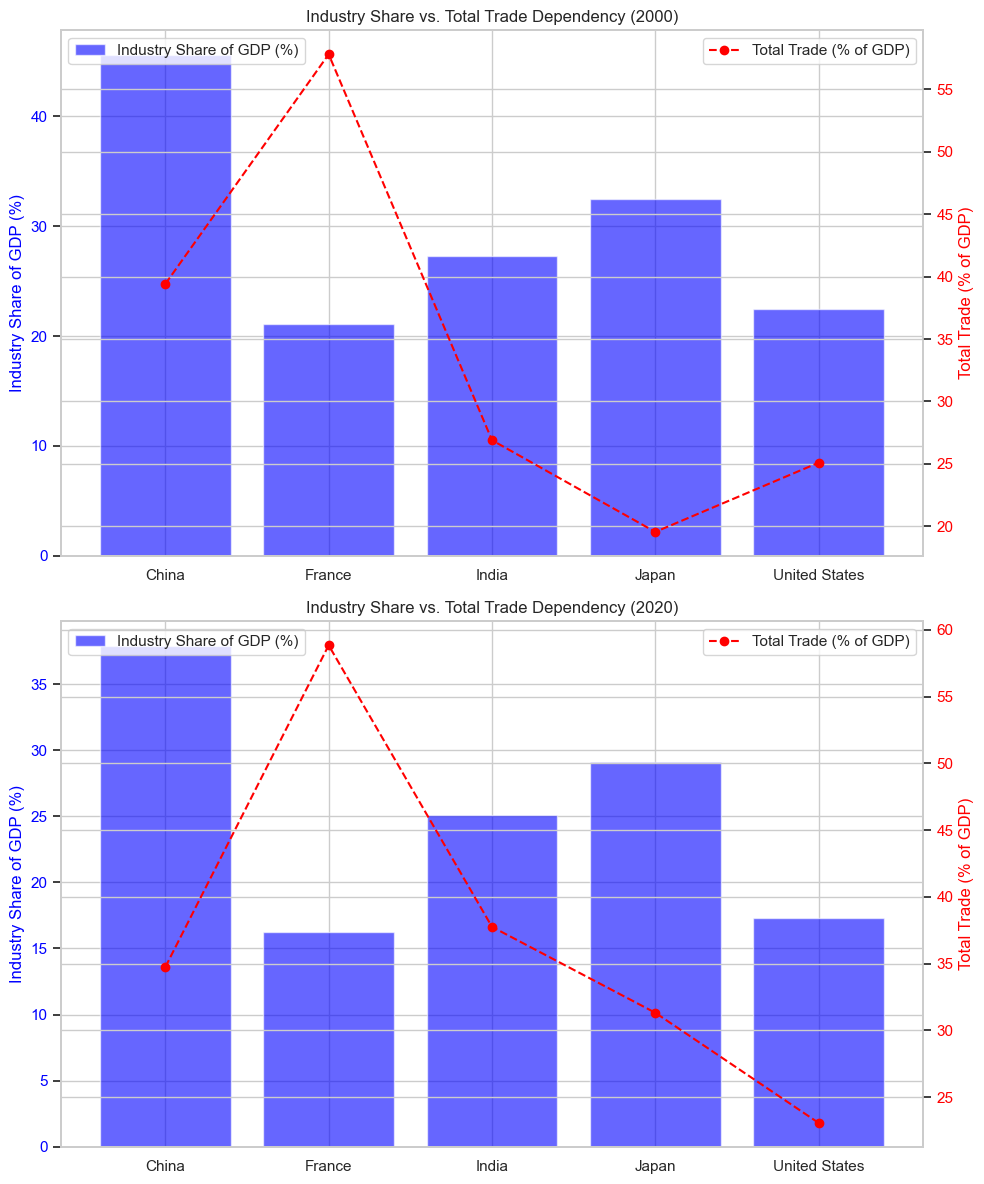

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
for i, year in enumerate(selected_years):
    df_latest = df_years[df_years["Year"] == year]

    ax1 = axes[i]  

   
    ax1.bar(df_latest["Country"], df_latest["Industry Share of GDP (%)"], color="blue", alpha=0.6, label="Industry Share of GDP (%)")
    ax1.set_ylabel("Industry Share of GDP (%)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    
    ax2 = ax1.twinx()
    ax2.plot(df_latest["Country"], df_latest["Total Trade (% of GDP)"], color="red", marker="o", linestyle="--", label="Total Trade (% of GDP)")
    ax2.set_ylabel("Total Trade (% of GDP)", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

   
    ax1.set_title(f"Industry Share vs. Total Trade Dependency ({year})")

   
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")


plt.tight_layout()
plt.show()

Idiom 8: High-Tech Exports vs. FDI (2020)

In [63]:
columns = ["Country Name", "Year", "TX.VAL.TECH.MF.ZS", "BX.KLT.DINV.CD.WD", "NY.GDP.MKTP.KD.ZG"]
df_selected = df[columns]
df_selected.columns = ["Country", "Year", "High-Tech Exports (%)", "FDI (current US$)", "GDP Growth (%)"]
df_selected["High-Tech Exports (%)"] = pd.to_numeric(df_selected["High-Tech Exports (%)"], errors="coerce")
df_selected["FDI (current US$)"] = pd.to_numeric(df_selected["FDI (current US$)"], errors="coerce")
df_selected["GDP Growth (%)"] = pd.to_numeric(df_selected["GDP Growth (%)"], errors="coerce")
df_selected = df_selected.dropna()
year = 2020
df_latest = df_selected[df_selected["Year"] == year]
countries = ["China", "United States", "India", "Japan", "France"]
df_latest = df_latest[df_latest["Country"].isin(countries)]

/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/4271474931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["High-Tech Exports (%)"] = pd.to_numeric(df_selected["High-Tech Exports (%)"], errors="coerce")
/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T/ipykernel_91390/4271474931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["FDI (current US$)"] = pd.to_numeric(df_selected["FDI (current US$)"], errors="coerce")
/var/folders/6f/t8mqbl9d1_s2y04qt91s430h0000gn/T

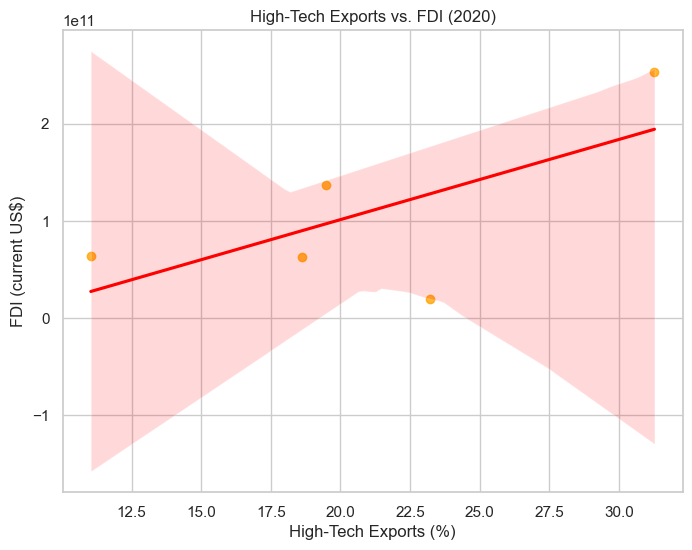

In [64]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df_latest["High-Tech Exports (%)"], y=df_latest["FDI (current US$)"], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("High-Tech Exports (%)")
plt.ylabel("FDI (current US$)")
plt.title("High-Tech Exports vs. FDI (2020)")
plt.grid(True)
plt.show()

Idiom 9: High-Tech Exports vs. FDI (2023)

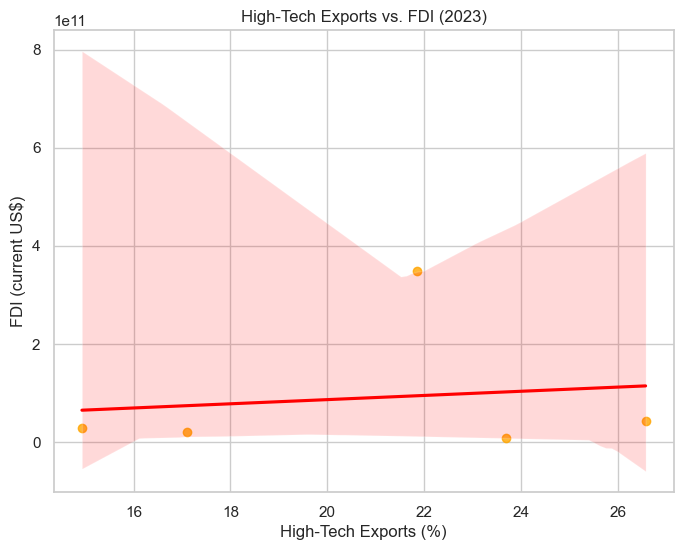

In [70]:
year = 2023
df_latest = df_selected[df_selected["Year"] == year]
countries = ["China", "United States", "India", "Japan", "France"]
df_latest = df_latest[df_latest["Country"].isin(countries)]

plt.figure(figsize=(8, 6))
sns.regplot(x=df_latest["High-Tech Exports (%)"], y=df_latest["FDI (current US$)"], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("High-Tech Exports (%)")
plt.ylabel("FDI (current US$)")
plt.title("High-Tech Exports vs. FDI (2023)")
plt.grid(True)
plt.show()

Idiom 10: FDI vs. GDP Growth Over Time

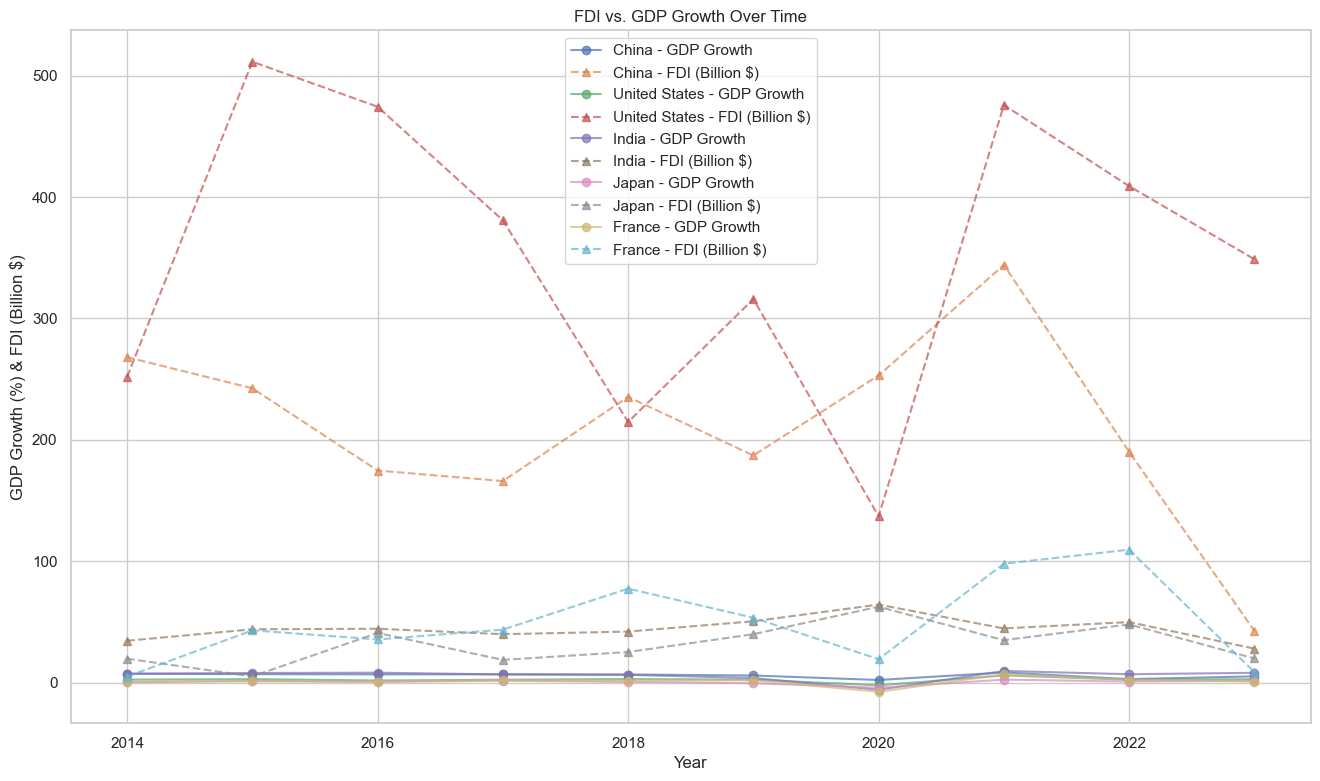

In [69]:
df_time_series = df_selected[df_selected["Country"].isin(countries)]
plt.figure(figsize=(16, 9))
for country in countries:
    df_country = df_time_series[df_time_series["Country"] == country]
    plt.plot(df_country["Year"], df_country["GDP Growth (%)"], marker="o", linestyle="-", label=f"{country} - GDP Growth", alpha=0.7)
    plt.plot(df_country["Year"], df_country["FDI (current US$)"] / 1e9, marker="^", linestyle="--", label=f"{country} - FDI (Billion $)", alpha=0.7)

plt.xlabel("Year")
plt.ylabel("GDP Growth (%) & FDI (Billion $)")
plt.title("FDI vs. GDP Growth Over Time")
plt.legend()
plt.grid(True)
plt.show()